In [64]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
dataFrame=pd.read_excel("bisiklet_fiyatlari.xlsx")

In [66]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


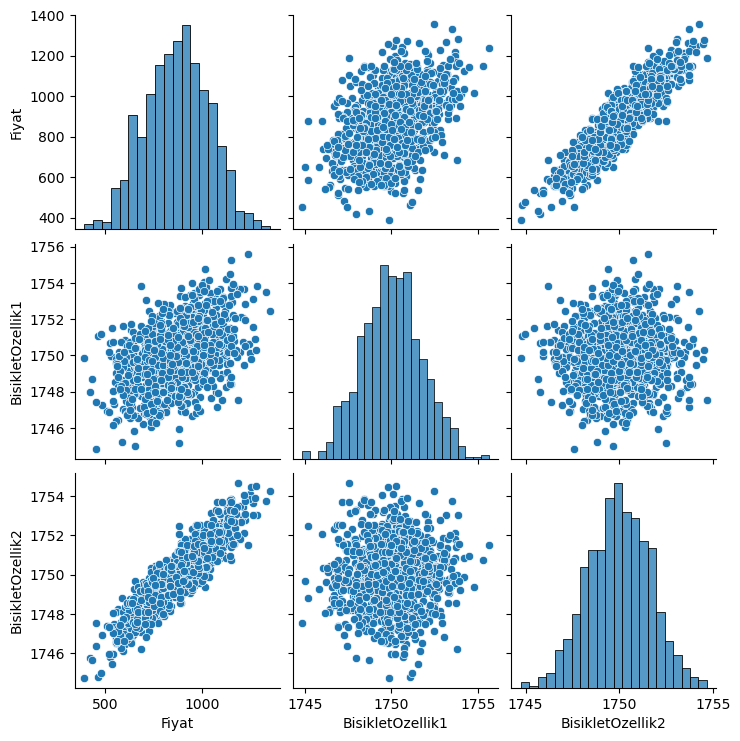

In [67]:
sbn.pairplot(dataFrame)

## veriyi test/train olarak ayırmak

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
#train_test_split 

In [70]:
dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [71]:
#y=wx+b
#y->label
y=dataFrame["Fiyat"].values

#x->features
x=dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [72]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [73]:
#scaling

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler(feature_range=(0,1))

In [76]:
scaler.fit(x_train)

MinMaxScaler()

In [77]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [79]:
import tensorflow as tf

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [81]:
model = Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [82]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795800.6875
Epoch 2/250
21/21 [==============================] - 0s 966us/step - loss: 795335.8125
Epoch 3/250
21/21 [==============================] - 0s 877us/step - loss: 794943.6875
Epoch 4/250
21/21 [==============================] - 0s 983us/step - loss: 794540.6875
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 794078.2500
Epoch 6/250
21/21 [==============================] - 0s 899us/step - loss: 793558.0000
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 792979.4375
Epoch 8/250
21/21 [==============================] - 0s 969us/step - loss: 792342.8125
Epoch 9/250
21/21 [==============================] - 0s 919us/step - loss: 791637.1250
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 790857.8125
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 789992.2500
Epoch 12/250
21/21 [==============================]

In [84]:
loss=model.history.history["loss"]

<AxesSubplot:>

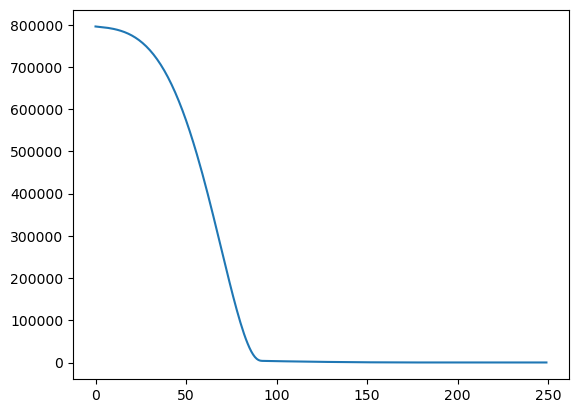

In [85]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [88]:
trainLoss=model.evaluate(x_train,y_train,verbose=0)

In [89]:
trainLoss

73.15709686279297

In [90]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [91]:
testLoss

77.6659927368164

In [93]:
testTahminleri = model.predict(x_test)

11/11 [==============================] - 0s 798us/step


In [95]:
testTahminleri

array([[1077.4843 ],
       [ 623.4206 ],
       [ 875.7594 ],
       [ 893.8358 ],
       [ 899.0909 ],
       [ 451.0249 ],
       [ 930.78284],
       [ 991.08057],
       [ 940.88477],
       [1016.44684],
       [ 750.5611 ],
       [ 917.5443 ],
       [ 947.13043],
       [1054.3876 ],
       [1121.1846 ],
       [ 681.1578 ],
       [1126.6404 ],
       [ 650.4895 ],
       [1154.2665 ],
       [ 886.18976],
       [ 892.45807],
       [ 716.416  ],
       [ 456.45328],
       [ 611.57416],
       [ 834.652  ],
       [1090.913  ],
       [ 713.37646],
       [ 756.49084],
       [ 873.0923 ],
       [ 770.2301 ],
       [ 450.8144 ],
       [ 782.6962 ],
       [ 727.8892 ],
       [ 646.38605],
       [ 886.36334],
       [ 843.4274 ],
       [1035.4187 ],
       [1022.45496],
       [ 844.5723 ],
       [ 861.84515],
       [ 756.7634 ],
       [1174.276  ],
       [1097.3052 ],
       [1087.5157 ],
       [ 872.8431 ],
       [ 596.20807],
       [1145.4188 ],
       [ 972.

In [97]:
tahminDataframe = pd.DataFrame(y_test,columns=["gerçek y"])

In [98]:
tahminDataframe

,gerçek y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [100]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [101]:
testTahminleri

0      1077.484253
1       623.420593
2       875.759399
3       893.835815
4       899.090881
          ...     
325    1013.240051
326     790.411194
327     765.595093
328    1167.312012
329     802.339294
Length: 330, dtype: float32

In [102]:
tahminDataframe = pd.concat([tahminDataframe,testTahminleri],axis=1)

In [103]:
tahminDataframe

,gerçek y,0
0,1081.652164,1077.484253
1,622.675990,623.420593
2,889.356810,875.759399
3,902.826733,893.835815
4,897.662404,899.090881
...,...,...
325,1028.438035,1013.240051
326,789.934950,790.411194
327,758.490486,765.595093
328,1172.871659,1167.312012


In [104]:
tahminDataframe.columns=["gerçek y","tahmin y"]

In [105]:
tahminDataframe

,gerçek y,tahmin y
0,1081.652164,1077.484253
1,622.675990,623.420593
2,889.356810,875.759399
3,902.826733,893.835815
4,897.662404,899.090881
...,...,...
325,1028.438035,1013.240051
326,789.934950,790.411194
327,758.490486,765.595093
328,1172.871659,1167.312012


<AxesSubplot:xlabel='gerçek y', ylabel='tahmin y'>

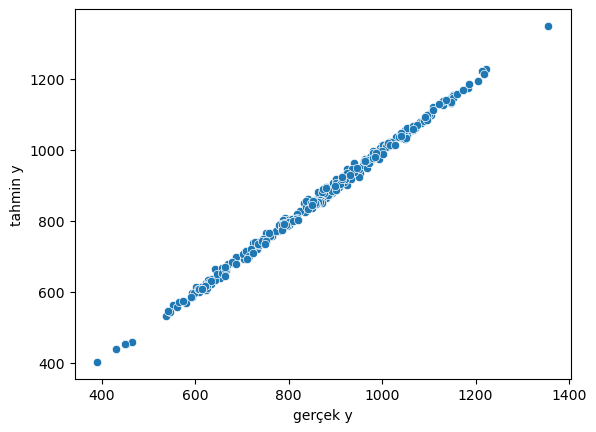

In [111]:
sbn.scatterplot(x="gerçek y",y="tahmin y",data=tahminDataframe)

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [113]:
mean_absolute_error(tahminDataframe["gerçek y"],tahminDataframe["tahmin y"])

7.061749793593748

In [114]:
mean_squared_error(tahminDataframe["gerçek y"],tahminDataframe["tahmin y"])

77.66601129216852

In [115]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [122]:
yeniBisiklet = [[1760,1759]]

In [123]:
yeniBisikletOzellikleri=scaler.transform(yeniBisiklet)

In [124]:
model.predict(yeniBisiklet)

1/1 [==============================] - 0s 31ms/step


array([[2256536.8]], dtype=float32)

In [125]:
from tensorflow.keras.models import load_model

In [127]:
model.save("bisiklet modeli.h5")